In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import optuna
import joblib 
from BorutaShap import BorutaShap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [2]:
pd.set_option('display.max_columns',50)

In [3]:
# Veriyi yükleme
df = pd.read_csv("creditcard.csv")

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

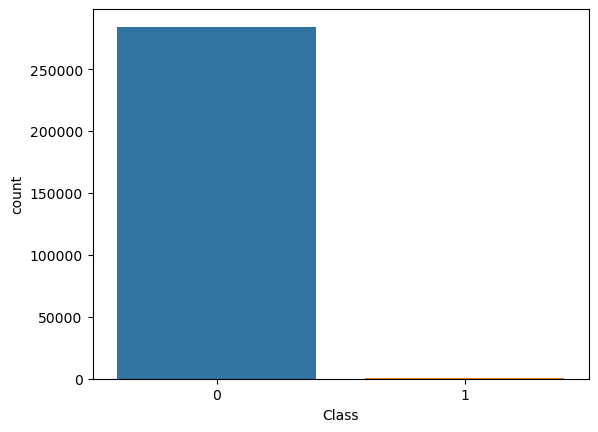

In [7]:
# Sınıf dağılımını inceleme
sns.countplot(x='Class', data=df)
plt.show()

In [8]:
print(df['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [9]:
# Time ve Amount sütunlarını ölçeklendirme
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
5,-1.996541,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556,0
6,-1.996499,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279,0
7,-1.996436,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107,0
8,-1.996436,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392,0
9,-1.996394,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516,0


In [10]:
# Özellikler ve hedef değişkeni belirleme
X = df.drop(columns=['Class'])
y = df['Class']

In [11]:
# Eğitim, validasyon ve test kümelerine ayırma
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Boyutları kontrol etme
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(199364, 30) (42721, 30) (42722, 30)
(199364,) (42721,) (42722,)


In [86]:
X_test.iloc[16580]

Time      0.794329
V1        2.063142
V2       -0.998322
V3       -0.119865
V4       -0.491542
V5       -1.069150
V6        0.177265
V7       -1.216119
V8        0.020306
V9        0.080150
V10       0.724472
V11      -1.105109
V12       0.800012
V13       2.261436
V14      -0.839153
V15       0.529712
V16      -0.785593
V17      -0.621228
V18       1.318970
V19      -0.978788
V20      -0.376526
V21      -0.309533
V22      -0.286483
V23       0.352669
V24       0.503897
V25      -0.602977
V26       0.461956
V27       0.014445
V28      -0.020334
Amount   -0.201902
Name: 198538, dtype: float64

In [12]:
# Azınlık sınıfındaki örneklerin sayısını hesapla
minority_class_count = df['Class'].sum()

# Çoğunluk sınıfındaki örneklerin sayısı
majority_class_count = len(df) - minority_class_count

# Azınlık sınıfının ağırlığını hesapla
scale_pos_weight = majority_class_count / minority_class_count

In [73]:
def objective(trial):
    # Hiperparametreler
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),
        'random_state': 42,
        'scale_pos_weight': trial.suggest_int('scale_pos_weight', 400, 800)
    }

    # Model eğitimi
    model = XGBClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    # AUC hesaplama
    preds = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, preds)
    return auc


In [74]:
# Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-05-23 14:10:33,934] A new study created in memory with name: no-name-be809f3a-21d2-4aaa-98e6-37ebb102d39b
[I 2024-05-23 14:10:34,905] Trial 0 finished with value: 0.9832634531499633 and parameters: {'n_estimators': 667, 'max_depth': 3, 'learning_rate': 0.15993704172034431, 'colsample_bytree': 0.961756909388183, 'subsample': 0.6341380328115539, 'alpha': 2.4093252977260233, 'lambda': 0.00012766173973981527, 'scale_pos_weight': 555}. Best is trial 0 with value: 0.9832634531499633.
[I 2024-05-23 14:10:36,420] Trial 1 finished with value: 0.9849297089431214 and parameters: {'n_estimators': 788, 'max_depth': 8, 'learning_rate': 0.03173033271821183, 'colsample_bytree': 0.7670943467948754, 'subsample': 0.6832358388877553, 'alpha': 0.0018325885872878059, 'lambda': 0.3507171375267512, 'scale_pos_weight': 721}. Best is trial 1 with value: 0.9849297089431214.
[I 2024-05-23 14:10:38,020] Trial 2 finished with value: 0.9812500673346688 and parameters: {'n_estimators': 499, 'max_depth': 6, 'l

[I 2024-05-23 14:11:21,364] Trial 22 finished with value: 0.9835012633568218 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1428634733214865, 'colsample_bytree': 0.5287135134799595, 'subsample': 0.5797189210706488, 'alpha': 0.2698547300513167, 'lambda': 0.11142981158733171, 'scale_pos_weight': 530}. Best is trial 14 with value: 0.9903283650381922.
[I 2024-05-23 14:11:24,526] Trial 23 finished with value: 0.9893981960012396 and parameters: {'n_estimators': 237, 'max_depth': 6, 'learning_rate': 0.043494863039891314, 'colsample_bytree': 0.6563104001339514, 'subsample': 0.6354870018452571, 'alpha': 0.008491570528385152, 'lambda': 2.8085043531252634e-05, 'scale_pos_weight': 447}. Best is trial 14 with value: 0.9903283650381922.
[I 2024-05-23 14:11:27,076] Trial 24 finished with value: 0.9824589226833229 and parameters: {'n_estimators': 347, 'max_depth': 6, 'learning_rate': 0.04268773820012465, 'colsample_bytree': 0.6535438916811019, 'subsample': 0.7329243401832634,

[I 2024-05-23 14:12:08,852] Trial 44 finished with value: 0.9878607474686918 and parameters: {'n_estimators': 246, 'max_depth': 5, 'learning_rate': 0.08730728886205671, 'colsample_bytree': 0.8939307203572245, 'subsample': 0.5901046836946701, 'alpha': 0.00977532930507033, 'lambda': 0.02722532795356956, 'scale_pos_weight': 598}. Best is trial 14 with value: 0.9903283650381922.
[I 2024-05-23 14:12:10,699] Trial 45 finished with value: 0.9796711089592183 and parameters: {'n_estimators': 733, 'max_depth': 6, 'learning_rate': 0.10522701490101606, 'colsample_bytree': 0.5318911017558781, 'subsample': 0.7577662615491161, 'alpha': 0.13389977525345578, 'lambda': 0.6195338182459237, 'scale_pos_weight': 657}. Best is trial 14 with value: 0.9903283650381922.
[I 2024-05-23 14:12:13,029] Trial 46 finished with value: 0.9846375556976538 and parameters: {'n_estimators': 335, 'max_depth': 7, 'learning_rate': 0.14018911981379192, 'colsample_bytree': 0.9935064008562274, 'subsample': 0.8415449033244202, 'al

[I 2024-05-23 14:12:59,129] Trial 66 finished with value: 0.9834499305739955 and parameters: {'n_estimators': 429, 'max_depth': 5, 'learning_rate': 0.08874673415913725, 'colsample_bytree': 0.5093230537977111, 'subsample': 0.9921493580429888, 'alpha': 0.011020332479747912, 'lambda': 1.130901958012274e-07, 'scale_pos_weight': 538}. Best is trial 63 with value: 0.9905341714730417.
[I 2024-05-23 14:13:01,487] Trial 67 finished with value: 0.9868738588754065 and parameters: {'n_estimators': 241, 'max_depth': 4, 'learning_rate': 0.045390784173491606, 'colsample_bytree': 0.5738057137664699, 'subsample': 0.6821612050716284, 'alpha': 0.00018910467984172623, 'lambda': 0.0004430722154118325, 'scale_pos_weight': 415}. Best is trial 63 with value: 0.9905341714730417.
[I 2024-05-23 14:13:05,055] Trial 68 finished with value: 0.9871306812240523 and parameters: {'n_estimators': 619, 'max_depth': 5, 'learning_rate': 0.03995318728973543, 'colsample_bytree': 0.7018483384940859, 'subsample': 0.63870385696

[I 2024-05-23 14:14:04,995] Trial 88 finished with value: 0.9894362202848146 and parameters: {'n_estimators': 255, 'max_depth': 10, 'learning_rate': 0.07017779508911075, 'colsample_bytree': 0.5585028548312228, 'subsample': 0.7430496219946574, 'alpha': 1.3084577733127958, 'lambda': 2.72422836764391e-07, 'scale_pos_weight': 678}. Best is trial 86 with value: 0.9907363339140487.
[I 2024-05-23 14:14:08,069] Trial 89 finished with value: 0.984676530588318 and parameters: {'n_estimators': 249, 'max_depth': 9, 'learning_rate': 0.08419995040669782, 'colsample_bytree': 0.5590678960631287, 'subsample': 0.7449240672590035, 'alpha': 1.14545301989994, 'lambda': 2.556357438038044e-07, 'scale_pos_weight': 633}. Best is trial 86 with value: 0.9907363339140487.
[I 2024-05-23 14:14:11,678] Trial 90 finished with value: 0.9844306402212 and parameters: {'n_estimators': 210, 'max_depth': 10, 'learning_rate': 0.06830532558922454, 'colsample_bytree': 0.9298183469412664, 'subsample': 0.7857534167850619, 'alph

In [75]:
# En iyi hiperparametreler
print("Best trial:")
trial = study.best_trial
print(trial.values)
print(trial.params)

Best trial:
[0.9907363339140487]
{'n_estimators': 241, 'max_depth': 9, 'learning_rate': 0.04955352225491341, 'colsample_bytree': 0.6321487450875378, 'subsample': 0.7420338020281777, 'alpha': 0.20972315036770486, 'lambda': 2.511438397842269e-07, 'scale_pos_weight': 791}


In [76]:
# En iyi hiperparametrelerle model eğitimi
best_params = trial.params
model = XGBClassifier(**best_params)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

XGBClassifier(alpha=0.20972315036770486, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6321487450875378, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=2.511438397842269e-07,
              learning_rate=0.04955352225491341, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=241, n_jobs=None, ...)

In [83]:
joblib.dump(model, 'FraudDetectionModel.pkl')

['FraudDetectionModel.pkl']

In [77]:
# Test seti üzerinde değerlendirme
y_pred_test = model.predict(X_test)
y_pred_test_proba = model.predict_proba(X_test)[:, 1]

In [78]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_test_proba))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.90      0.81      0.85        74

    accuracy                           1.00     42722
   macro avg       0.95      0.91      0.93     42722
weighted avg       1.00      1.00      1.00     42722

Confusion Matrix:
[[42641     7]
 [   14    60]]
ROC-AUC Score:
0.9659576571506792


Rastgele seçilen örnek:
Time      1.043023
V1        1.895713
V2       -1.547156
V3       -2.600566
V4       -3.104195
V5        0.453455
V6        0.607453
V7       -0.193953
V8        0.066715
V9        0.515055
V10      -0.403885
V11       1.022519
V12       1.292792
V13       0.326260
V14       0.725984
V15       1.134756
V16      -3.330520
V17       0.528064
V18       0.587929
V19      -0.221167
V20      -0.385963
V21      -0.077579
V22       0.273031
V23      -0.047638
V24      -0.934870
V25       0.183372
V26      -0.632670
V27       0.051896
V28      -0.055097
Amount    0.210061
Name: 225673, dtype: float64
Gerçek etiket: 0
Tahmin edilen etiket: 0
Tahmin olasılığı (non-fraud, fraud): [9.9998051e-01 1.9503814e-05]


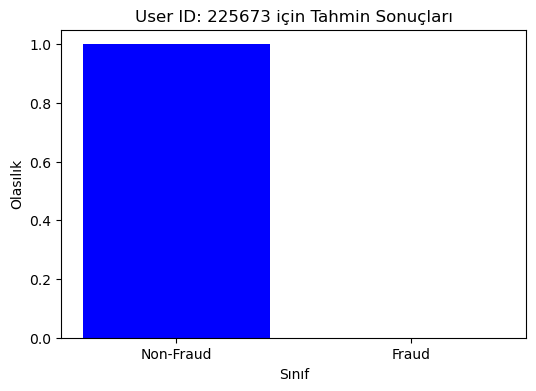

In [79]:
# Test kümesinden rastgele bir satır seçme
random_index = np.random.choice(X_test.index)
random_sample = X_test.loc[random_index]
random_sample_true_label = y_test.loc[random_index]

print("Rastgele seçilen örnek:")
print(random_sample)
print("Gerçek etiket:", random_sample_true_label)

# Rastgele örneğin tahminini yapma
random_sample_reshaped = random_sample.values.reshape(1, -1)  # Modelin kabul edeceği formata getirme
random_sample_prediction = model.predict(random_sample_reshaped)
random_sample_prediction_proba = model.predict_proba(random_sample_reshaped)

print("Tahmin edilen etiket:", random_sample_prediction[0])
print("Tahmin olasılığı (non-fraud, fraud):", random_sample_prediction_proba[0])

# Tahmin edilen olasılığı görselleştirme
labels = ['Non-Fraud', 'Fraud']
probas = random_sample_prediction_proba[0]

plt.figure(figsize=(6, 4))
plt.bar(labels, probas, color=['blue', 'red'])
plt.xlabel('Sınıf')
plt.ylabel('Olasılık')
plt.title(f"User ID: {random_index} için Tahmin Sonuçları")
plt.show()

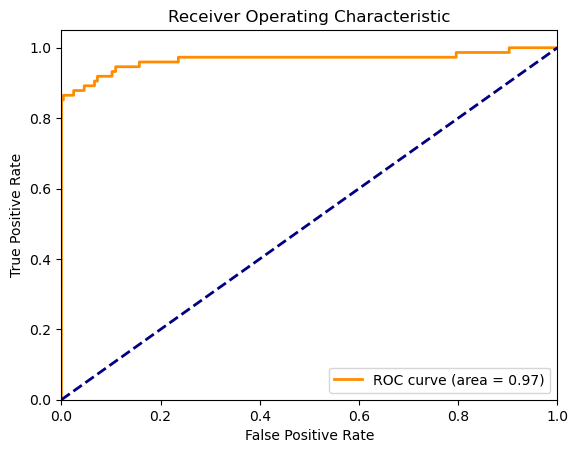

In [80]:
# ROC eğrisi
fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

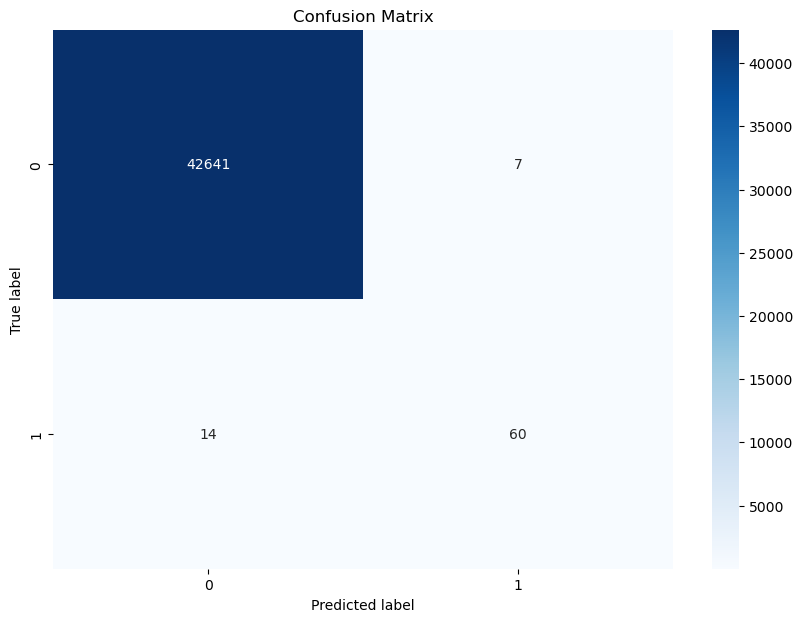

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()